In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels

from scipy import stats
from statsmodels.stats import stattools
from statsmodels.stats.weightstats import DescrStatsW

<b>Datasets : </b> https://www.kaggle.com/kandij/mall-customers

In [6]:
mall_data = pd.read_csv('datasets/mall_data_processed.csv', index_col=0)

mall_data.head(5)

,gender,age,annual_income,spending_score,above_average_income
customer_id,,,,,
1,Male,19,15000,39,False
2,Male,21,15000,81,False
3,Female,20,16000,6,False
4,Female,23,16000,77,False
5,Female,31,17000,40,False


In [7]:
mall_data.shape

(200, 5)

In [8]:
mall_data.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


In [9]:
income_descr = DescrStatsW(mall_data['annual_income'])

age_descr = DescrStatsW(mall_data['age'])

In [10]:
q1_income = income_descr.quantile(0.25)

q3_income = income_descr.quantile(0.75)

In [11]:
q1_income

p
0.25    41000
dtype: int64

In [12]:
q3_income

p
0.75    78000
dtype: int64

In [13]:
type(q1_income)

pandas.core.series.Series

In [14]:
iqr_income = q3_income.loc[0.75] - q1_income.loc[0.25]

iqr_income

37000

In [15]:
stats.iqr(mall_data['annual_income'])

36500.0

In [16]:
stats.iqr(mall_data['annual_income'], interpolation='lower')

38000

In [17]:
stats.iqr(mall_data['annual_income'], interpolation='higher')

36000

In [18]:
stats.iqr(mall_data['annual_income'], interpolation='midpoint')

37000.0

In [19]:
q1_income_np = np.percentile(mall_data['annual_income'], 25)

q1_income_np

41500.0

In [20]:
q3_income_np = np.percentile(mall_data['annual_income'], 75)

q3_income_np

78000.0

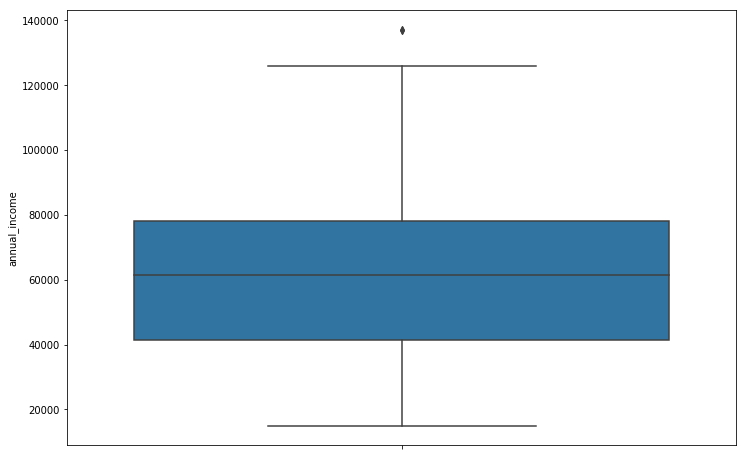

In [21]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_data['annual_income'], orient='v')

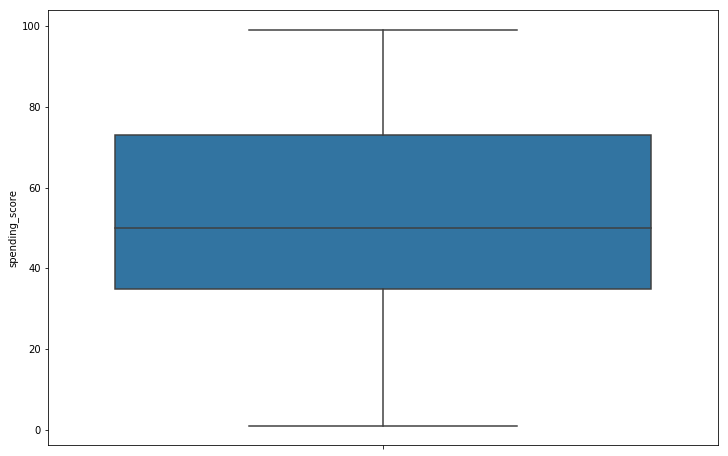

In [22]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_data['spending_score'], orient='v')

In [23]:
mall_data.head()

,gender,age,annual_income,spending_score,above_average_income
customer_id,,,,,
1,Male,19,15000,39,False
2,Male,21,15000,81,False
3,Female,20,16000,6,False
4,Female,23,16000,77,False
5,Female,31,17000,40,False


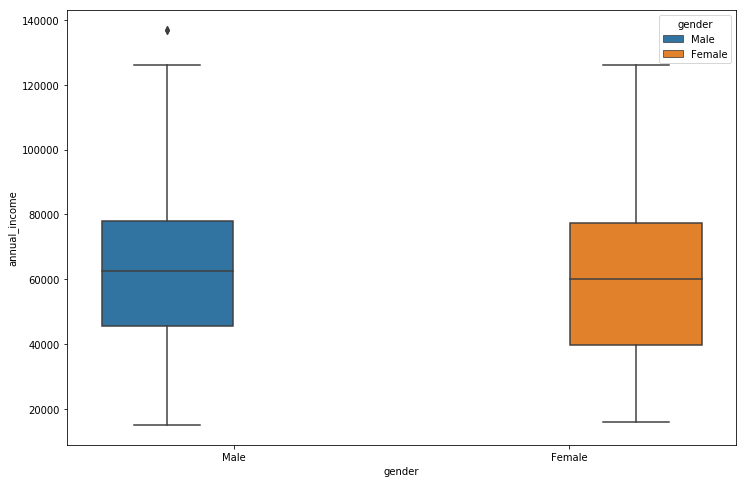

In [24]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='gender', y='annual_income', hue='gender', data=mall_data, orient='v')

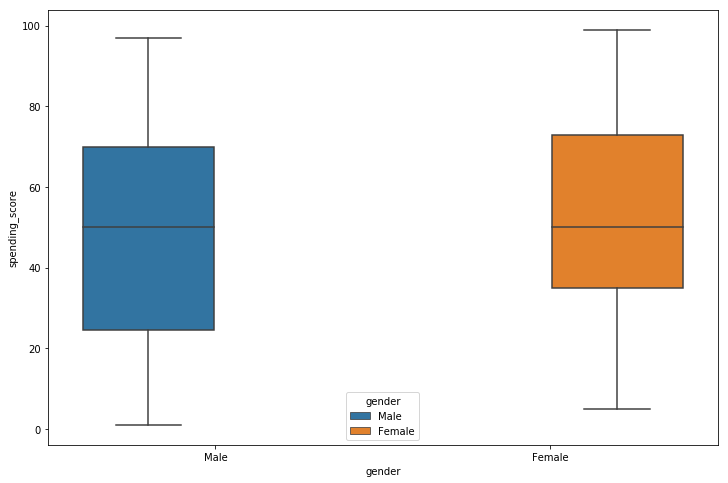

In [25]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='gender', y='spending_score', hue='gender', data=mall_data, orient='v')

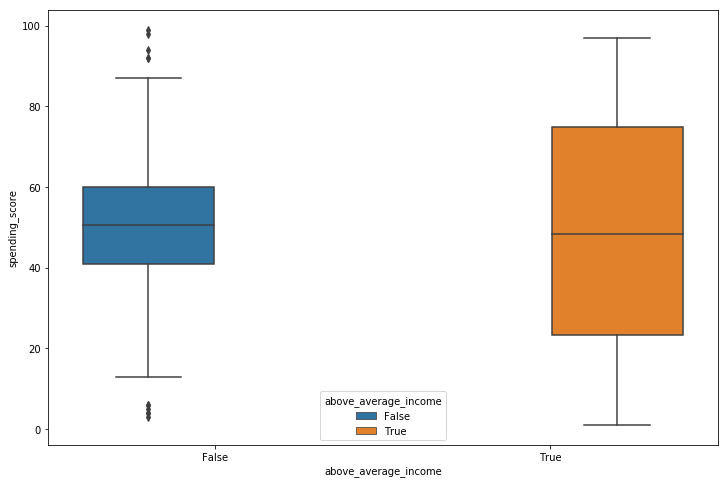

In [26]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='above_average_income', y='spending_score', hue='above_average_income', 
            data=mall_data, orient='v')

In [27]:
income_descr.var

686386400.0

In [28]:
age_descr.var

194.1575

### Calculating Standard Deviation

In [29]:
income_descr.std

26198.97707926781

In [30]:
age_descr.std

13.934041050606963

#### Describe using stats

In [31]:
stats.describe(mall_data['annual_income'])

DescribeResult(nobs=200, minmax=(15000, 137000), mean=60560.0, variance=689835577.8894472, skewness=0.3194236842763142, kurtosis=-0.1258928297475106)

In [32]:
stats.describe(mall_data['age'])

DescribeResult(nobs=200, minmax=(18, 70), mean=38.85, variance=195.13316582914572, skewness=0.48191947090957177, kurtosis=-0.6847513947723236)

In [33]:
listOfSeries = [pd.Series(['Male', 20, 250000, 98, True], index=mall_data.columns ), 
                pd.Series(['Female', 18, 280000, 20, True], index=mall_data.columns ),
                pd.Series(['Male', 78, 20000, 22, True], index=mall_data.columns )
               ]

In [34]:
mall_updated = mall_data.append(listOfSeries , ignore_index=True)

mall_updated.tail()

,gender,age,annual_income,spending_score,above_average_income
198,Male,32,137000,18,True
199,Male,30,137000,83,True
200,Male,20,250000,98,True
201,Female,18,280000,20,True
202,Male,78,20000,22,True


In [38]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [39]:
np.ptp(mall_data['annual_income'])

122000

In [40]:
np.ptp(mall_updated['annual_income'])

265000

In [41]:
stats.iqr(mall_data['annual_income'], interpolation='midpoint')

37000.0

In [42]:
stats.iqr(mall_updated['annual_income'], interpolation='midpoint')

37000.0

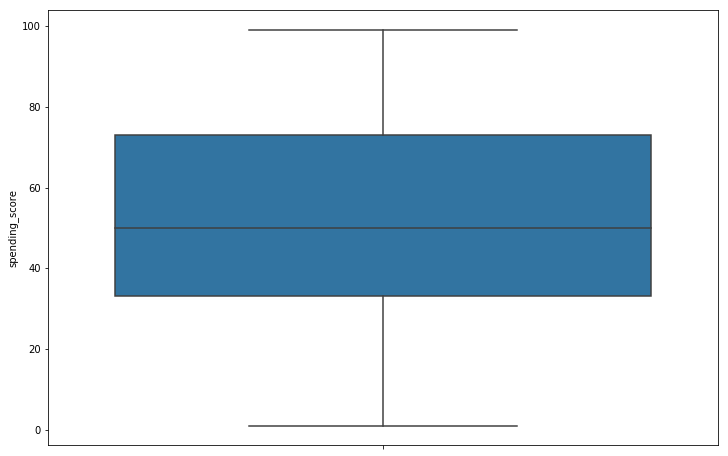

In [43]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_updated['spending_score'], orient='v')

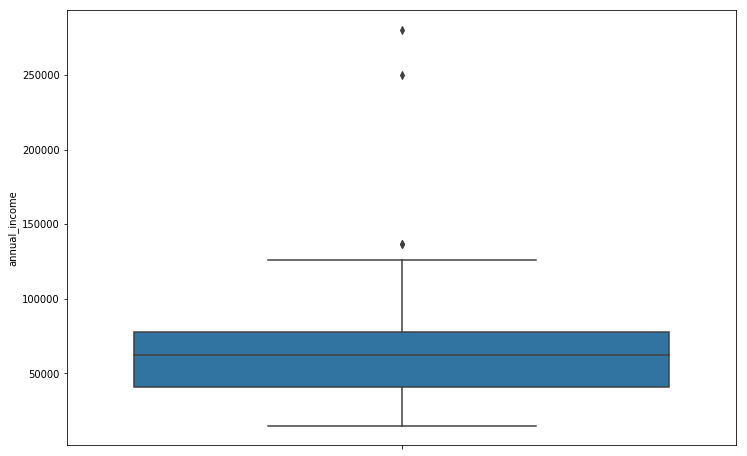

In [44]:
plt.figure(figsize=(12, 8))

sns.boxplot(mall_updated['annual_income'], orient='v')